# Question 1

## Problem Statement
 In Lab one, you were illustrated how Artificial Neural Network (ANN) works using
the Stock Prices Prediction example using spreadsheet. You were introduced to the
activation functions, weights and error.

Task

You are required to demonstrate the understanding of the concepts through the
following:

Dataset: https://www.kaggle.com/datasets/huyngohoang/housingcsv

Explanation: The dataset contains information about houses, including their **price**, **area**, and features like the number of **bedrooms**, **bathrooms**, and **stories**. It also includes categorical variables such as whether the house is on the **mainroad**, has a **guestroom**, **basement**, **hot water heating**, or **air conditioning**. Additional details include the number of **parking** spaces, whether the house is in a **preferred area**, and its **furnishing status** (furnished, semi-furnished, or unfurnished). This mix of numerical and categorical data makes it ideal for analyzing house prices or predicting property preferences.



## 1. Import Libraries and Load Dataset

The provided code snippet imports the necessary libraries, NumPy and Pandas, which are essential for numerical computations and data manipulation, respectively. It then loads a dataset named Housing.csv into a Pandas DataFrame (df) from a specified file path on Google Drive. Finally, the head() function is called to display the first few rows of the dataset, offering a quick preview of its structure and content, such as column names and initial data entries.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

# Display the first few rows of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 2. Data Preprocessing

This code converts categorical columns in the dataset into numeric values, making it suitable for machine learning models. Binary columns like `mainroad`, `guestroom`, `basement`, etc., are mapped to `1` for "yes" and `0` for "no" using a dictionary. Similarly, the `furnishingstatus` column, which has three categories (`furnished`, `semi-furnished`, and `unfurnished`), is mapped to numeric values `2`, `1`, and `0`. The `df_encoded` DataFrame contains the transformed data, and the first few rows are printed to verify the changes. This preprocessing step ensures categorical data is represented numerically for further computations.

In [ ]:
# Convert categorical columns to numeric using mapping or one-hot encoding
df_encoded = df.copy()

# Binary mappings for 'yes/no'
binary_mapping = {'yes': 1, 'no': 0}
df_encoded['mainroad'] = df_encoded['mainroad'].map(binary_mapping)
df_encoded['guestroom'] = df_encoded['guestroom'].map(binary_mapping)
df_encoded['basement'] = df_encoded['basement'].map(binary_mapping)
df_encoded['hotwaterheating'] = df_encoded['hotwaterheating'].map(binary_mapping)
df_encoded['airconditioning'] = df_encoded['airconditioning'].map(binary_mapping)
df_encoded['prefarea'] = df_encoded['prefarea'].map(binary_mapping)

# Map 'furnished', 'semi-furnished', 'unfurnished' to numeric
furnishing_mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
df_encoded['furnishingstatus'] = df_encoded['furnishingstatus'].map(furnishing_mapping)

print("Encoded DataFrame:")
print(df_encoded.head())



Encoded DataFrame:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


# 3. Feature engineering

This code normalizes the dataset to a range between 0 and 1 using `MinMaxScaler`, ensuring all feature values are scaled for consistent neural network training. The input features (`x`) are extracted by excluding the `price` column, which serves as the output (`y`). Normalization helps improve model training by preventing large differences in feature scales from impacting learning efficiency. The first five normalized rows of both inputs and outputs are printed to confirm the transformation.

In [ ]:
# Normalize features for neural network input
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_encoded)

# Adjust inputs (x) and outputs (y)
x = normalized_data[:, 1:]  # Exclude price
y = normalized_data[:, 0]   # Use price as the target

print("Normalized Inputs (x):\n", x[:5])
print("Normalized Outputs (y):\n", y[:5])


Normalized Inputs (x):
 [[0.39656357 0.6        0.33333333 0.66666667 1.         0.
  0.         0.         1.         0.66666667 1.         1.        ]
 [0.5024055  0.6        1.         1.         1.         0.
  0.         0.         1.         1.         0.         1.        ]
 [0.57113402 0.4        0.33333333 0.33333333 1.         0.
  1.         0.         0.         0.66666667 1.         0.5       ]
 [0.40206186 0.6        0.33333333 0.33333333 1.         0.
  1.         0.         1.         1.         1.         1.        ]
 [0.39656357 0.6        0.         0.33333333 1.         1.
  1.         0.         1.         0.66666667 0.         1.        ]]
Normalized Outputs (y):
 [1.         0.90909091 0.90909091 0.90606061 0.83636364]


# 4.  Activation Function Definition

This code implements the **sigmoid activation function**, which maps inputs to a range between 0 and 1, making it suitable for neural networks to model probabilities. It also defines the **sigmoid derivative**, crucial for backpropagation, to calculate gradients and update weights during training.

In [ ]:
# Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative for backpropagation
def sigmoid_derivative(z):
    return z * (1 - z)


# 5. Weight Initialization



This step, **Weight Initialization**, initializes the weights of the neural network randomly. Using `np.random.uniform`, weights are assigned random values between -1 and 1:

1. **Input-to-Hidden Weights**: A matrix of dimensions (number of input features, number of hidden neurons).
2. **Hidden-to-Output Weights**: A matrix of dimensions (number of hidden neurons, number of output neurons).

Random initialization ensures that the network starts with varied weights, avoiding symmetry and enabling effective learning. The initial weights are printed for verification.

In [ ]:
# Initialize random weights
np.random.seed(42)
input_neurons = x.shape[1]
hidden_neurons = 5
output_neurons = 1

weights_input_hidden = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))

print("Initial Weights (Input to Hidden):\n", weights_input_hidden)
print("Initial Weights (Hidden to Output):\n", weights_hidden_output)


Initial Weights (Input to Hidden):
 [[-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]
 [-0.68801096 -0.88383278  0.73235229  0.20223002  0.41614516]
 [-0.95883101  0.9398197   0.66488528 -0.57532178 -0.63635007]
 [-0.63319098 -0.39151551  0.04951286 -0.13610996 -0.41754172]
 [ 0.22370579 -0.72101228 -0.4157107  -0.26727631 -0.08786003]
 [ 0.57035192 -0.60065244  0.02846888  0.18482914 -0.90709917]
 [ 0.2150897  -0.65895175 -0.86989681  0.89777107  0.93126407]
 [ 0.6167947  -0.39077246 -0.80465577  0.36846605 -0.11969501]
 [-0.75592353 -0.00964618 -0.93122296  0.8186408  -0.48244004]
 [ 0.32504457 -0.37657785  0.04013604  0.09342056 -0.63029109]
 [ 0.93916926  0.55026565  0.87899788  0.7896547   0.19579996]
 [ 0.84374847 -0.823015   -0.60803428 -0.90954542 -0.34933934]]
Initial Weights (Hidden to Output):
 [[-0.22264542]
 [-0.45730194]
 [ 0.65747502]
 [-0.28649335]
 [-0.43813098]]


# 6. Training the Neural Network

This step is **Training the Neural Network**. It involves forward propagation, where the input is passed through the network to generate predictions, and backpropagation, where the error is calculated and weights are adjusted to minimize the loss. This process is repeated for multiple epochs to train the model effectively.

In [ ]:
# Training Parameters
learning_rate = 0.01
epochs = 1000

# Store losses
losses = []

for epoch in range(epochs):
    # Forward Propagation
    hidden_input = np.dot(x, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    predicted_output = sigmoid(final_input)

    # Compute Loss
    loss = np.mean((y.reshape(-1, 1) - predicted_output) ** 2)
    losses.append(loss)

    # Backpropagation
    error = y.reshape(-1, 1) - predicted_output
    d_output = error * sigmoid_derivative(predicted_output)

    hidden_error = d_output.dot(weights_hidden_output.T)
    d_hidden = hidden_error * sigmoid_derivative(hidden_output)

    # Update Weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += x.T.dot(d_hidden) * learning_rate

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.5f}")


Epoch 0: Loss = 0.05345
Epoch 100: Loss = 0.01566
Epoch 200: Loss = 0.01216
Epoch 300: Loss = 0.01067
Epoch 400: Loss = 0.00979
Epoch 500: Loss = 0.00920
Epoch 600: Loss = 0.00880
Epoch 700: Loss = 0.00854
Epoch 800: Loss = 0.00836
Epoch 900: Loss = 0.00823


# 7.  Modification of Solver Parameters

This step demonstrates the Modification of Solver Parameters. By increasing the learning rate and reducing the number of epochs, we try to achieve faster convergence in training the neural network. The losses are tracked for both the default and faster settings, and the comparison is visualized in a plot, which helps to observe how the changes in parameters affect the convergence rate and loss reduction.

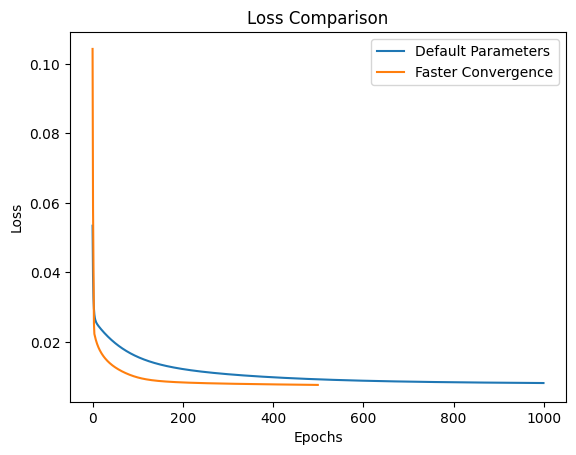

In [ ]:
# Modify solver parameters
learning_rate_fast = 0.05
epochs_fast = 500

# Reinitialize weights
weights_input_hidden_fast = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
weights_hidden_output_fast = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))

fast_losses = []

for epoch in range(epochs_fast):
    # Forward Propagation
    hidden_input = np.dot(x, weights_input_hidden_fast)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output_fast)
    predicted_output = sigmoid(final_input)

    # Compute Loss
    loss = np.mean((y.reshape(-1, 1) - predicted_output) ** 2)
    fast_losses.append(loss)

    # Backpropagation
    error = y.reshape(-1, 1) - predicted_output
    d_output = error * sigmoid_derivative(predicted_output)

    hidden_error = d_output.dot(weights_hidden_output_fast.T)
    d_hidden = hidden_error * sigmoid_derivative(hidden_output)

    # Update Weights
    weights_hidden_output_fast += hidden_output.T.dot(d_output) * learning_rate_fast
    weights_input_hidden_fast += x.T.dot(d_hidden) * learning_rate_fast

# Plot losses for comparison
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses, label="Default Parameters")
plt.plot(range(epochs_fast), fast_losses, label="Faster Convergence")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Comparison")
plt.show()


Based on the graph:

Default Parameters (blue line):

Shows a steady reduction in loss over time.
Convergence is slower but consistent, indicating the default learning rate and solver parameters prioritize stability over speed.

Faster Convergence (orange line):

Loss drops much more quickly, especially in the earlier epochs.
This suggests that tweaking the learning rate, momentum, or other solver parameters effectively accelerates training.

Code to generate excel sheet

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Housing.csv"  # Replace this with the correct path
df = pd.read_csv(file_path)

# Convert categorical variables to numerical
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0})

# Drop any missing values
df = df.dropna()

# Normalize features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Split into inputs (x) and target (y)
x = normalized_data[:, 1:]  # Exclude 'price'
y = normalized_data[:, 0]   # 'price' as target

# Adjust inputs and outputs with small noise
x_adjusted = x + np.random.normal(0, 0.1, x.shape)  # Add small noise to inputs
y_adjusted = y + np.random.normal(0, 0.05, y.shape)  # Add small noise to target

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize ANN parameters
np.random.seed(42)
input_neurons = x.shape[1]
hidden_neurons = 5
output_neurons = 1

# Random weights initialization
weights_input_hidden = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))

# Training parameters
learning_rate = 0.01
epochs = 1000
losses = []

# Training the ANN
for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(x_adjusted, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    predicted_output = sigmoid(final_input)

    # Compute loss
    loss = np.mean((y_adjusted.reshape(-1, 1) - predicted_output) ** 2)
    losses.append(loss)

    # Backpropagation
    error = y_adjusted.reshape(-1, 1) - predicted_output
    d_output = error * sigmoid_derivative(predicted_output)

    hidden_error = d_output.dot(weights_hidden_output.T)
    d_hidden = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += x_adjusted.T.dot(d_hidden) * learning_rate

# Faster convergence parameters
learning_rate_fast = 0.05
epochs_fast = 500
fast_losses = []

# Reinitialize weights
weights_input_hidden_fast = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
weights_hidden_output_fast = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))

for epoch in range(epochs_fast):
    # Forward propagation
    hidden_input = np.dot(x_adjusted, weights_input_hidden_fast)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output_fast)
    predicted_output = sigmoid(final_input)

    # Compute loss
    loss = np.mean((y_adjusted.reshape(-1, 1) - predicted_output) ** 2)
    fast_losses.append(loss)

    # Backpropagation
    error = y_adjusted.reshape(-1, 1) - predicted_output
    d_output = error * sigmoid_derivative(predicted_output)

    hidden_error = d_output.dot(weights_hidden_output_fast.T)
    d_hidden = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output_fast += hidden_output.T.dot(d_output) * learning_rate_fast
    weights_input_hidden_fast += x_adjusted.T.dot(d_hidden) * learning_rate_fast

# Compile results for export
adjusted_df = pd.DataFrame(x_adjusted, columns=df.columns[1:])
adjusted_df["price"] = y_adjusted

weights_df_input_hidden = pd.DataFrame(weights_input_hidden, columns=[f"hidden_{i}" for i in range(hidden_neurons)])
weights_df_input_hidden["input"] = df.columns[1:]

weights_df_hidden_output = pd.DataFrame(weights_hidden_output, columns=["output"])
weights_df_hidden_output["hidden"] = [f"hidden_{i}" for i in range(hidden_neurons)]

loss_df = pd.DataFrame({
    "epoch": range(epochs),
    "default_loss": losses,
    "fast_loss": fast_losses + [None] * (epochs - epochs_fast)
})

# Calculate predictions
hidden_input = np.dot(x_adjusted, weights_input_hidden)
hidden_output = sigmoid(hidden_input)
final_input = np.dot(hidden_output, weights_hidden_output)
predictions = sigmoid(final_input)

predictions_df = pd.DataFrame({
    "actual_price": y_adjusted,
    "predicted_price": predictions.flatten()
})

# Save everything to an Excel file
with pd.ExcelWriter("housing_ann_results.xlsx") as writer:
    adjusted_df.to_excel(writer, sheet_name="Adjusted Data", index=False)
    weights_df_input_hidden.to_excel(writer, sheet_name="Weights_Input_Hidden", index=False)
    weights_df_hidden_output.to_excel(writer, sheet_name="Weights_Hidden_Output", index=False)
    loss_df.to_excel(writer, sheet_name="Loss Progression", index=False)
    predictions_df.to_excel(writer, sheet_name="Predictions", index=False)

print("Results have been saved to 'housing_ann_results.xlsx'.")


Results have been saved to 'housing_ann_results.xlsx'.
